In [1]:
import pandas as pd
import os

In [2]:
path='D:\\CDS503\\Assignment 2\\Continent\\Data'
os.chdir(path)

# Read csv data file
# Data without feature standardization
df = pd.read_csv('countries_geocodes.csv')

In [3]:
df_actual_continent = pd.read_csv('countries_geocode_continent.csv')

In [4]:
df_actual_continent

,latitude,longitude,country_name,continent
0,33.939110,67.709953,Afghanistan,Asia
1,41.153332,20.168331,Albania,Europe
2,28.033886,1.659626,Algeria,Africa
3,-14.270972,-170.132217,American Samoa,Oceania
4,42.506285,1.521801,Andorra,Europe
...,...,...,...,...
244,24.215527,-12.885834,Western Sahara,Africa
245,15.552727,48.516388,Yemen,Asia
246,-13.133897,27.849332,Zambia,Africa
247,-19.015438,29.154857,Zimbabwe,Africa


In [5]:
target = df[['latitude','longitude']]

In [6]:
target

,latitude,longitude
0,33.939110,67.709953
1,41.153332,20.168331
2,28.033886,1.659626
3,-14.270972,-170.132217
4,42.506285,1.521801
...,...,...
244,24.215527,-12.885834
245,15.552727,48.516388
246,-13.133897,27.849332
247,-19.015438,29.154857


# K-Means

C:\Users\Mackhem\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Mackhem\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Mackhem\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Mackhem\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the e

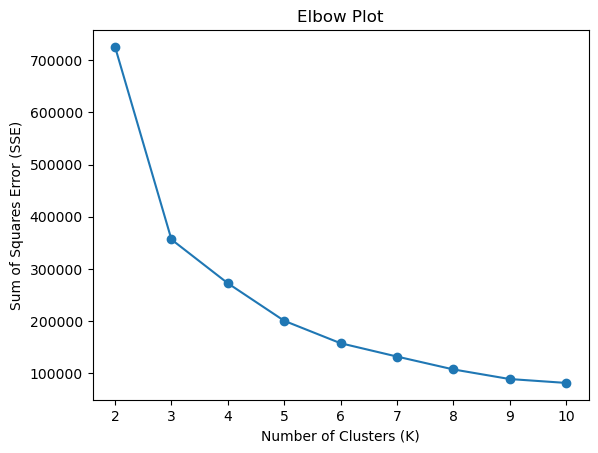

In [7]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Specify the range of K_values to test
k_values = range(2, 11)

# Initialize an empty list to store the SSE values
sse_values = []

# Iterate over each K value
for k in k_values:
    # Initialize and fit the K-means model
    kmeans = KMeans(n_clusters=k, random_state=0).fit(target)
    
    # calculate SSE and append to the list
    sse = kmeans.inertia_
    sse_values.append(sse)

plt.plot(k_values, sse_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squares Error (SSE)')
plt.title('Elbow Plot')
plt.show()


In [8]:
import numpy as np

kmeans = KMeans(n_clusters = 8, random_state = 0)
kmeans.fit(target)
centroids = kmeans.cluster_centers_

squared_distances = np.square(target - centroids[kmeans.labels_])
sse_per_cluster = np.sum(squared_distances, axis=1)
total_sse = np.sum(sse_per_cluster)

print("\nTotal SSE:", total_sse)


print("\nLabel of each point: \n", kmeans.labels_)
print("Coordinates of cluster centers: \n", centroids)
print("\nNumber of iterations run: ", kmeans.n_iter_)

C:\Users\Mackhem\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Mackhem\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



Total SSE: 107389.45158112883

Label of each point: 
 [7 0 6 4 0 3 2 5 2 2 7 2 5 0 7 2 7 1 2 0 0 2 6 2 1 2 0 3 3 2 3 2 1 0 6 3 1
 6 2 6 2 2 6 6 2 1 1 1 2 3 6 3 4 2 0 2 2 7 0 6 0 7 2 2 2 7 2 6 7 0 7 2 0 5
 0 0 2 4 3 6 6 2 0 6 0 0 0 2 2 5 2 0 6 6 2 2 3 2 1 0 0 1 1 7 7 0 0 7 0 2 1
 0 7 7 3 4 7 7 1 0 7 3 6 0 0 0 0 1 0 3 3 1 1 6 0 5 2 6 3 3 2 5 0 0 1 0 2 6
 3 1 3 5 1 0 5 5 2 6 6 4 5 1 5 0 7 7 5 7 2 5 2 2 1 4 0 0 2 7 0 1 3 3 4 0 7
 6 0 3 6 1 2 0 0 5 3 3 2 1 3 0 1 2 6 2 2 2 2 2 7 2 0 3 0 0 7 6 1 7 3 1 5 6
 4 4 2 0 7 7 2 5 5 2 0 2 3 0 7 2 7 5 0 2 1 4 6 7 3 3 0]
Coordinates of cluster centers: 
 [[  49.13415273   11.04527028]
 [  19.26297174  104.62467122]
 [   9.62003573  -69.14907131]
 [ -16.50361159   37.73891391]
 [ -15.84210807 -164.35100116]
 [ -10.81353477  156.11725861]
 [  10.75386428   -1.10167986]
 [  29.86142026   48.3508315 ]]

Number of iterations run:  6


In [9]:
y_kmeans = kmeans.fit_predict(target)
y_kmeans

C:\Users\Mackhem\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Mackhem\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([7, 0, 6, 4, 0, 3, 2, 5, 2, 2, 7, 2, 5, 0, 7, 2, 7, 1, 2, 0, 0, 2,
       6, 2, 1, 2, 0, 3, 3, 2, 3, 2, 1, 0, 6, 3, 1, 6, 2, 6, 2, 2, 6, 6,
       2, 1, 1, 1, 2, 3, 6, 3, 4, 2, 0, 2, 2, 7, 0, 6, 0, 7, 2, 2, 2, 7,
       2, 6, 7, 0, 7, 2, 0, 5, 0, 0, 2, 4, 3, 6, 6, 2, 0, 6, 0, 0, 0, 2,
       2, 5, 2, 0, 6, 6, 2, 2, 3, 2, 1, 0, 0, 1, 1, 7, 7, 0, 0, 7, 0, 2,
       1, 0, 7, 7, 3, 4, 7, 7, 1, 0, 7, 3, 6, 0, 0, 0, 0, 1, 0, 3, 3, 1,
       1, 6, 0, 5, 2, 6, 3, 3, 2, 5, 0, 0, 1, 0, 2, 6, 3, 1, 3, 5, 1, 0,
       5, 5, 2, 6, 6, 4, 5, 1, 5, 0, 7, 7, 5, 7, 2, 5, 2, 2, 1, 4, 0, 0,
       2, 7, 0, 1, 3, 3, 4, 0, 7, 6, 0, 3, 6, 1, 2, 0, 0, 5, 3, 3, 2, 1,
       3, 0, 1, 2, 6, 2, 2, 2, 2, 2, 7, 2, 0, 3, 0, 0, 7, 6, 1, 7, 3, 1,
       5, 6, 4, 4, 2, 0, 7, 7, 2, 5, 5, 2, 0, 2, 3, 0, 7, 2, 7, 5, 0, 2,
       1, 4, 6, 7, 3, 3, 0])

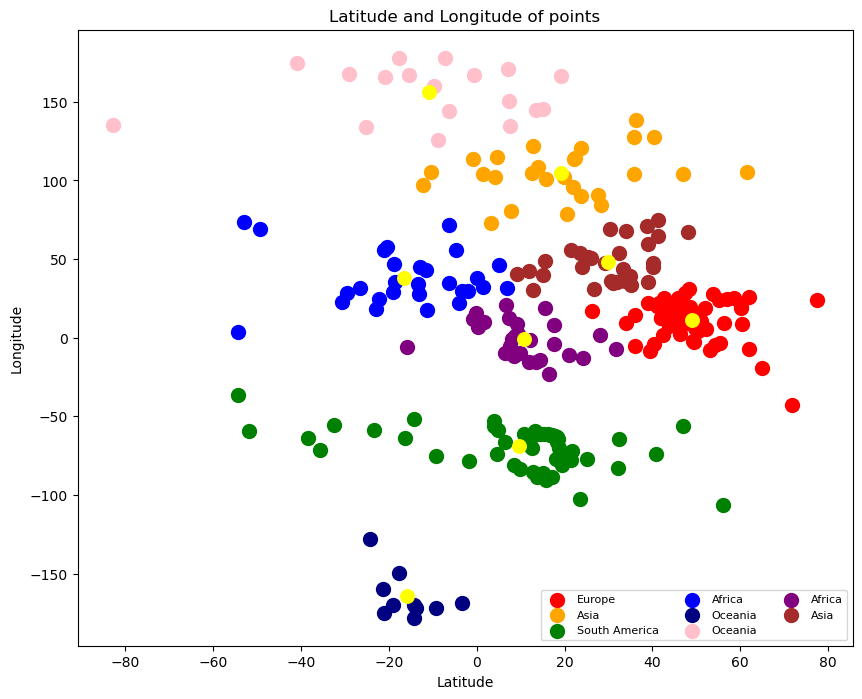

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize =(10,8))

cluster0 = plt.scatter(target.iloc[y_kmeans == 0,0], target.iloc[y_kmeans == 0,1], s = 100, \
                       c = 'red', label = 'Europe')
cluster1 = plt.scatter(target.iloc[y_kmeans == 1,0], target.iloc[y_kmeans == 1,1], s = 100, \
                       c = 'orange', label = 'Asia')
cluster2 = plt.scatter(target.iloc[y_kmeans == 2,0], target.iloc[y_kmeans == 2,1], s = 100, \
                       c = 'green', label = 'South America')
cluster3 = plt.scatter(target.iloc[y_kmeans == 3,0], target.iloc[y_kmeans == 3,1], s = 100, \
                       c = 'blue', label = 'Africa')
cluster4 = plt.scatter(target.iloc[y_kmeans == 4,0], target.iloc[y_kmeans == 4,1], s = 100, \
                       c = 'navy', label = 'Oceania')
cluster5 = plt.scatter(target.iloc[y_kmeans == 5,0], target.iloc[y_kmeans == 5,1], s = 100, \
                       c = 'pink', label = 'Oceania')
cluster6 = plt.scatter(target.iloc[y_kmeans == 6,0], target.iloc[y_kmeans == 6,1], s = 100, \
                       c = 'purple', label = 'Africa')
cluster7 = plt.scatter(target.iloc[y_kmeans == 7,0], target.iloc[y_kmeans == 7,1], s = 100, \
                       c = 'brown', label = 'Asia')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 95,\
           c = 'yellow', label = 'Centroids')

plt.legend((cluster0, cluster1, cluster2, cluster3, cluster4, cluster5, cluster6, cluster7),
          ('Europe', 'Asia', 'South America', 'Africa', 'Oceania', 'Oceania', 'Africa', 'Asia'),
          scatterpoints = 1,
          loc = 'lower right',
          ncol = 3,
          fontsize = 8)

plt.title("Latitude and Longitude of points")

plt.xlabel('Latitude')

plt.ylabel('Longitude')

plt.show()

## Dictionary for Ocean Names = Continent

In [11]:
#Dictionary for ocean name to its continent
#Ocean name is matched with their respective continent on Google Map
def get_continent(ocean_name):
    ocean_to_continent = {
        "Arctic Ocean": "AN",
        "Southern Ocean": "AN",
        "Indian Ocean": "AS",
        "Atlantic Ocean": "AF",
        "South Pacific Ocean": "OC",
        "North Pacific Ocean": "AS",
        "Mediterranean Sea, Western Basin": "EU",
        "Philippine Sea": "AS",
        "Coral Sea": "OC",
        "Caribbean Sea": "NA",
        "South Atlantic Ocean": "SA/ZA",
        "Arabian Sea": "AS",
        "Solomon Sea": "OC"
    }
    
    continent = ocean_to_continent.get(ocean_name)
    return continent

## Find Continent Code

In [12]:
#Given latitude and longitude, find Continent code by reverse finding
import requests
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import pycountry_convert as pc

geolocator = Nominatim(user_agent="http")

def getContinentCode(centroidsLat,centroidsLng):
    for latitude,longitude in zip(centroidsLat,centroidsLng):
        try:
            location = geolocator.reverse((latitude, longitude))
            address = location.raw['address']
            country_code = address.get('country_code').upper()
            continent = pc.country_alpha2_to_continent_code(country_code)
            print(continent)
        except:
            url = f"http://api.geonames.org/oceanJSON?lat={latitude}&lng={longitude}&username=abilimckl1"
            response = requests.get(url)
            data = response.json()
            try:
                # Extract the continent name from the API responseocean = data.get('ocean')
                ocean_name = data['ocean']['name']
                continent = get_continent(ocean_name)
                
                print(continent + " - " + ocean_name)
            except:
                print("AN")

In [13]:
#Find Continent code for K Means Centroids 
centroidsLat = kmeans.cluster_centers_[:,0]
centroidsLng = kmeans.cluster_centers_[:,1]

getContinentCode(centroidsLat,centroidsLng)

EU
AS
SA
AF
OC - South Pacific Ocean
OC - Solomon Sea
AF
AS


# Agglomerative Clustering

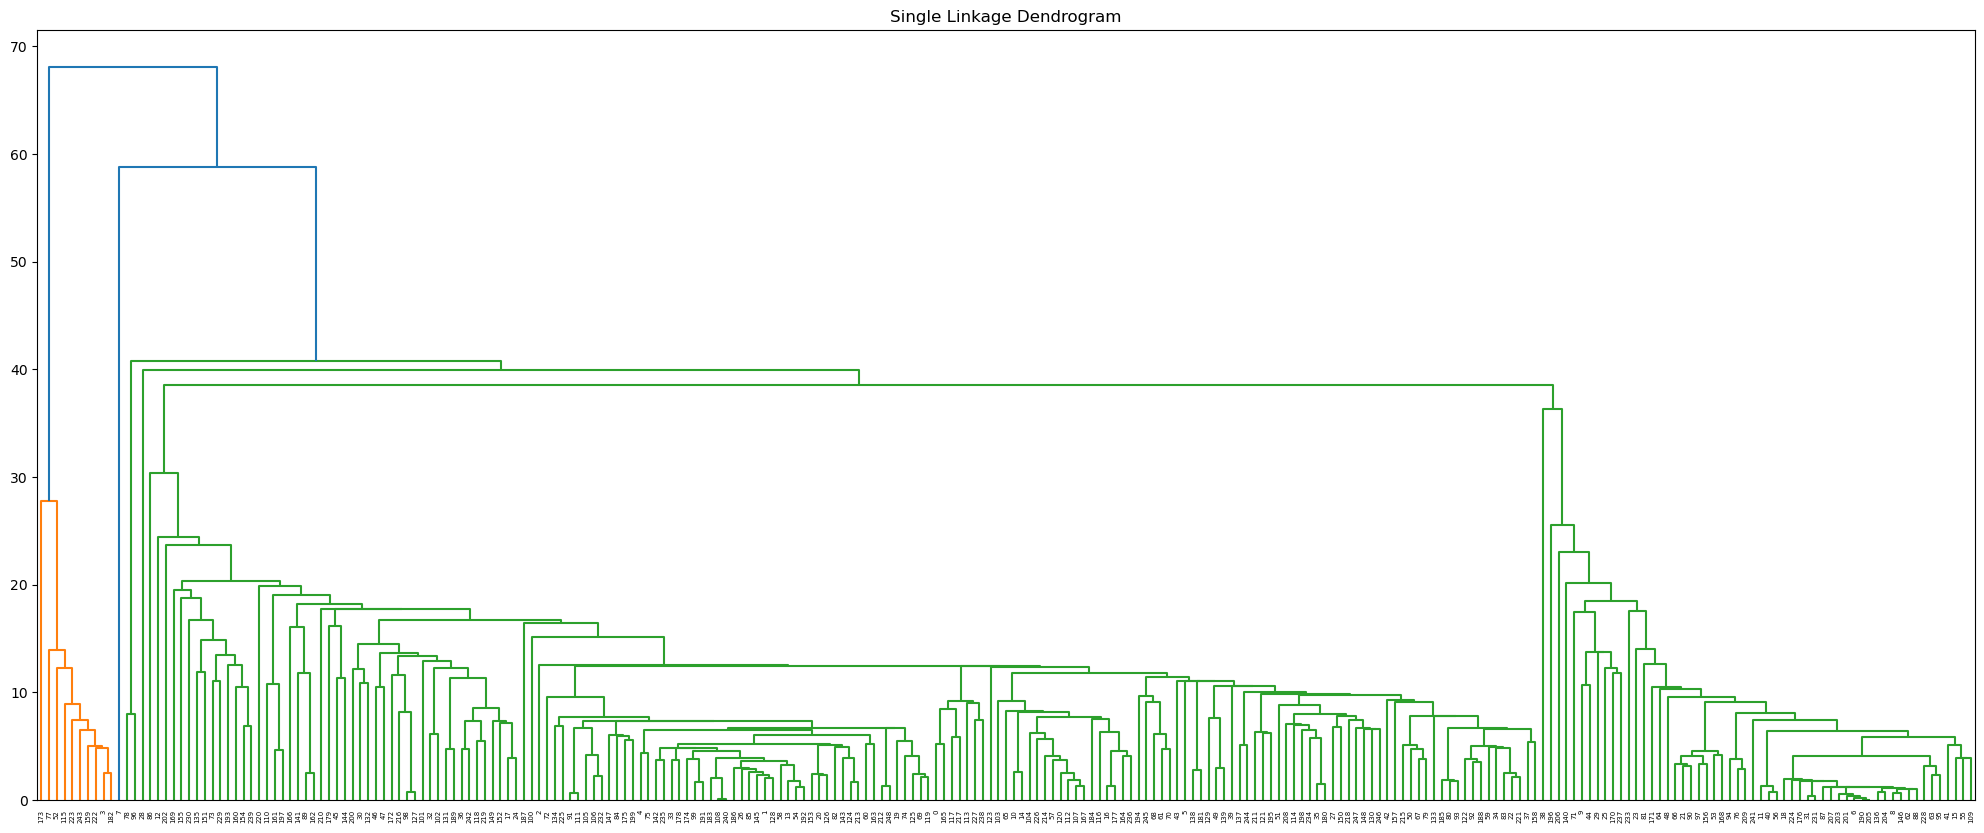

In [14]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

plt.figure(figsize = (25, 10))
plt.title("Single Linkage Dendrogram")

sch.dendrogram(sch.linkage(target, method = 'single', metric='cityblock'))

plt.show()

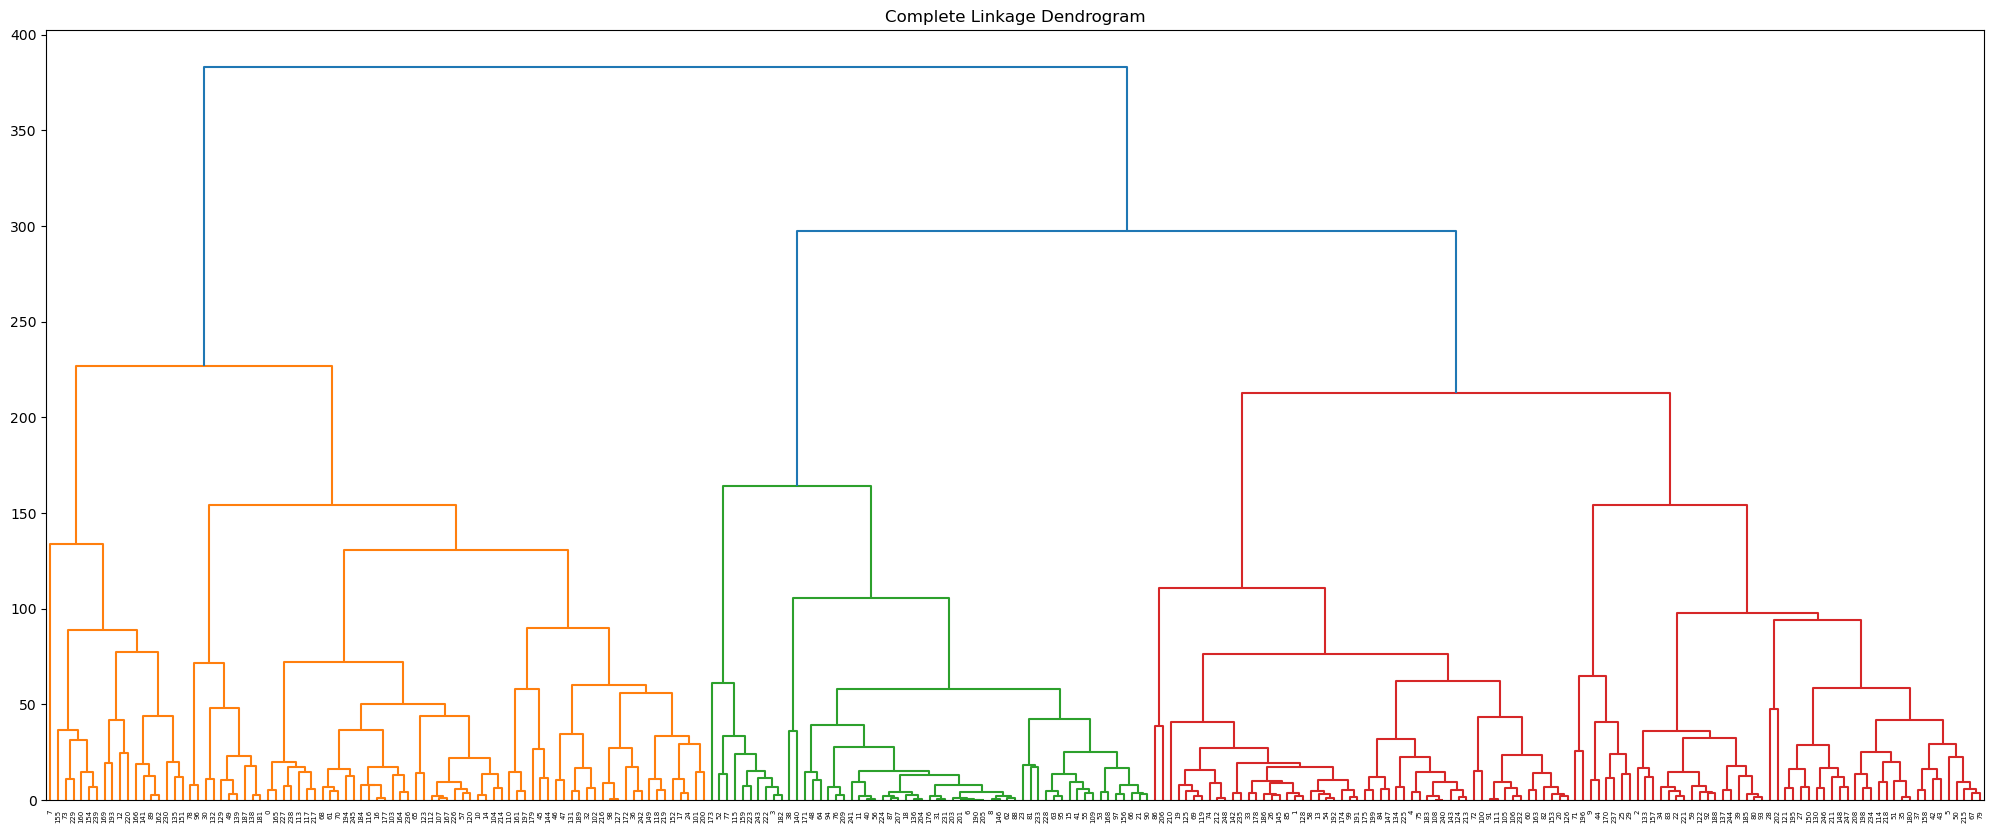

In [15]:
plt.figure(figsize = (25, 10))
plt.title("Complete Linkage Dendrogram")

sch.dendrogram(sch.linkage(target, method = 'complete', metric='cityblock'))

plt.show()

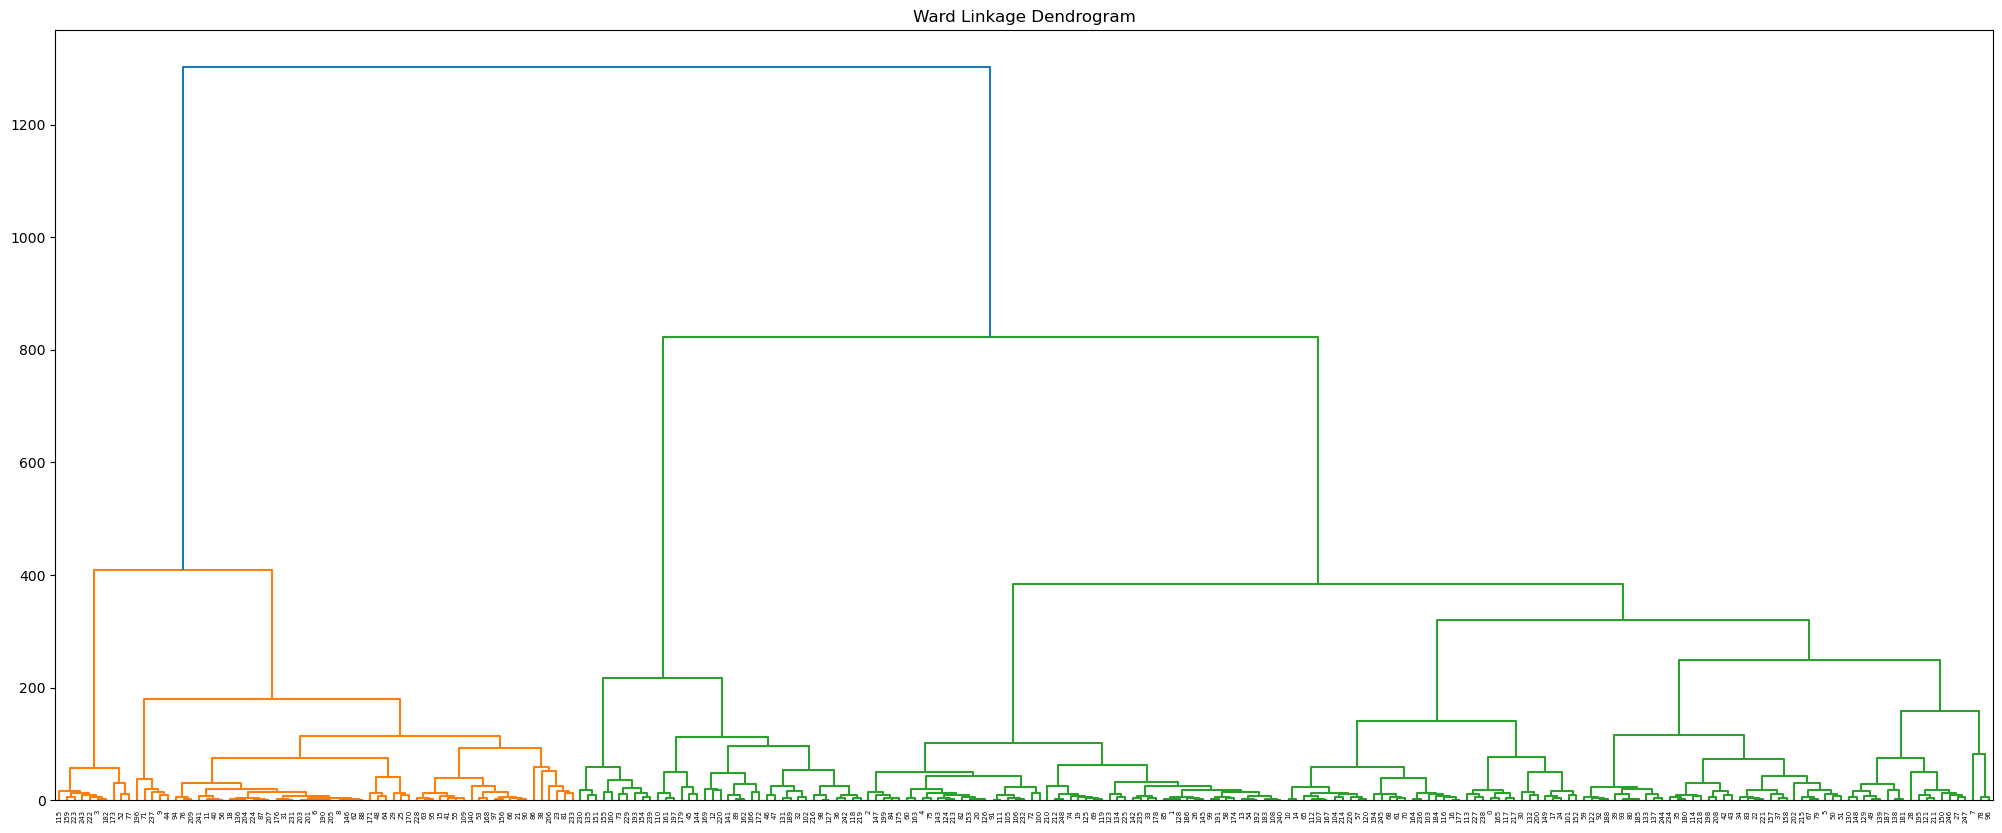

In [16]:
plt.figure(figsize = (25, 10))
plt.title("Ward Linkage Dendrogram")

sch.dendrogram(sch.linkage(target, method = 'ward'))

plt.show()

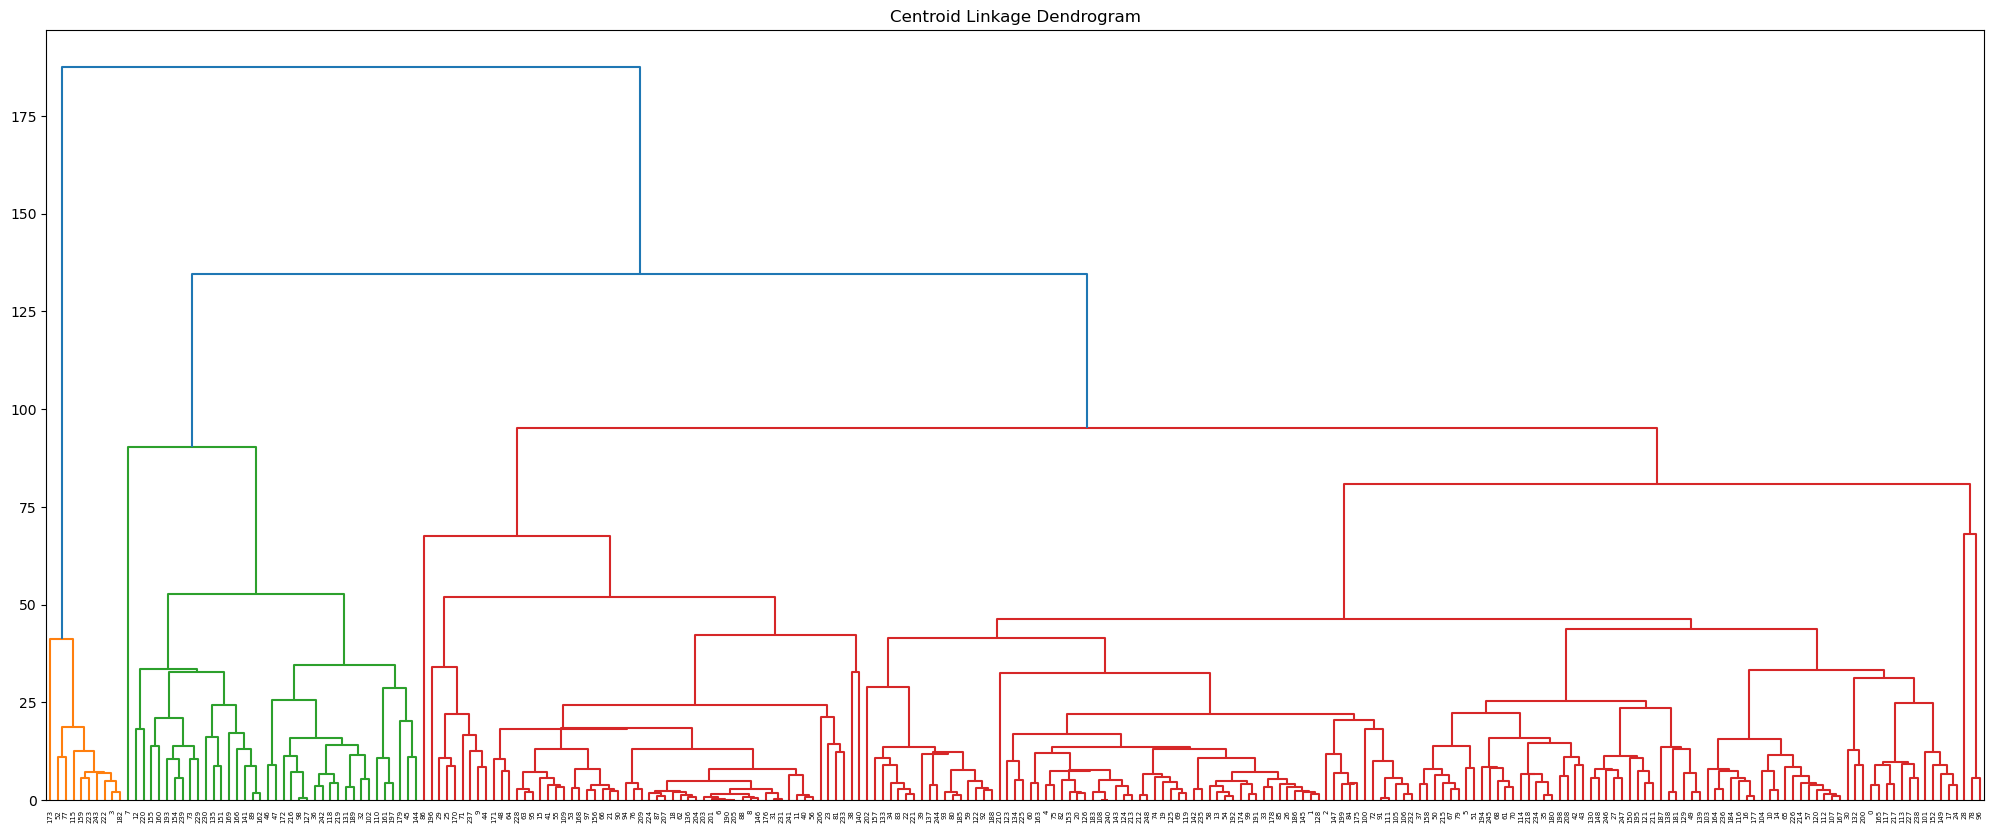

In [17]:
plt.figure(figsize = (25, 10))
plt.title("Centroid Linkage Dendrogram")

sch.dendrogram(sch.linkage(target, method = 'centroid'))

plt.show()

In [18]:
# Import hierarchical clustering library
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestCentroid

# Create AgglomerativeClustering object
ag = AgglomerativeClustering(n_clusters = 9, metric = 'manhattan', linkage = 'complete')
ag.fit(target)
# Print the cluster label of each data point
print("Label of each point: ", ag.labels_)

Label of each point:  [0 1 3 5 1 3 2 8 2 6 0 2 4 1 0 2 0 0 2 1 1 2 3 2 0 6 1 3 3 6 7 2 0 1 3 3 0
 3 2 3 2 2 3 3 6 0 0 0 2 7 3 3 5 2 1 2 2 0 1 3 1 0 2 2 2 0 2 3 0 1 0 6 1 4
 1 1 2 5 7 3 3 2 1 3 1 1 1 2 2 4 2 1 3 3 2 2 7 2 0 1 1 0 0 0 0 1 1 0 1 2 0
 1 0 0 3 5 0 0 0 1 0 3 3 0 1 1 1 0 1 7 3 0 7 3 1 4 2 3 7 7 2 4 1 1 0 1 2 1
 3 0 3 4 0 1 4 4 2 3 3 5 4 0 4 1 0 0 4 0 2 4 6 2 0 5 1 1 2 0 1 0 3 7 5 1 0
 3 1 7 3 0 2 1 1 4 0 3 6 0 3 1 0 2 3 2 2 2 1 2 3 2 1 3 1 1 0 3 0 0 3 0 4 3
 5 5 2 1 0 0 2 4 4 2 1 2 3 1 0 6 0 4 1 2 0 5 3 0 3 3 1]


In [19]:
# Save new clusters for plot
y_hc = ag.fit_predict(target)

clf = NearestCentroid(metric="manhattan")
clf.fit(target,y_hc)
agCentroids = clf.centroids_
print(agCentroids)

[[  26.3351      69.345116 ]
 [  47.463931    12.5125785]
 [  16.265      -68.2385339]
 [   6.428055    11.609444 ]
 [  -7.109535   165.618042 ]
 [ -15.986771  -169.999725 ]
 [ -34.098963   -58.9837225]
 [ -15.7972235   56.544268 ]
 [ -82.862752   135.       ]]


In [20]:
#Find Continent code for Agglomerative nearest Centroids 
centroidsLat = agCentroids[:,0]
centroidsLng = agCentroids[:,1]

getContinentCode(centroidsLat,centroidsLng)

AS
EU
NA - Caribbean Sea
AF
OC - South Pacific Ocean
OC - South Pacific Ocean
SA
AS - Indian Ocean
AN


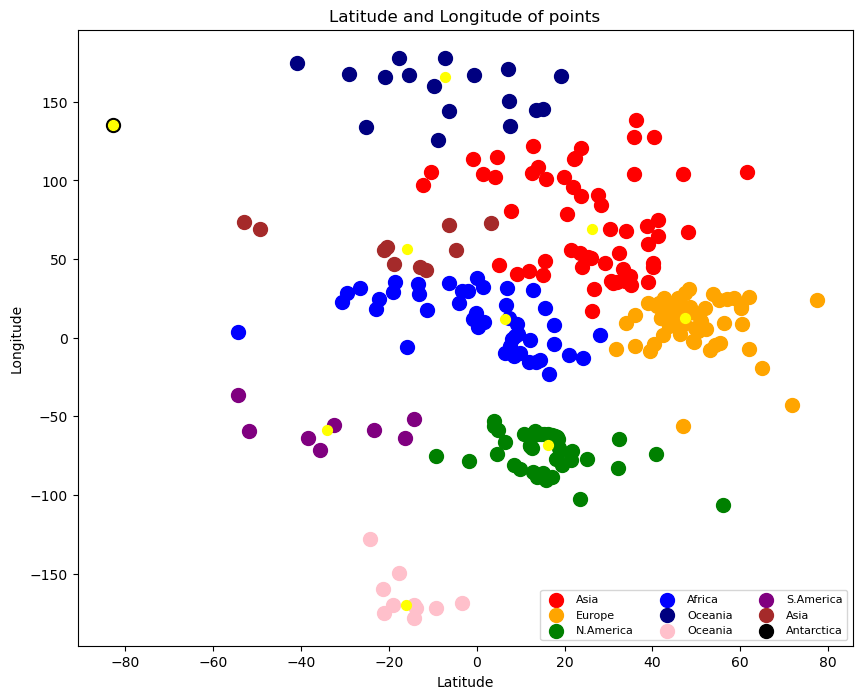

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize =(10,8))

cluster0 = plt.scatter(target.iloc[y_hc == 0,0], target.iloc[y_hc == 0,1], s = 100, \
                       c = 'red', label = 'Asia')
cluster1 = plt.scatter(target.iloc[y_hc == 1,0], target.iloc[y_hc == 1,1], s = 100, \
                       c = 'orange', label = 'Europe')
cluster2 = plt.scatter(target.iloc[y_hc == 2,0], target.iloc[y_hc == 2,1], s = 100, \
                       c = 'green', label = 'N.America')
cluster3 = plt.scatter(target.iloc[y_hc == 3,0], target.iloc[y_hc == 3,1], s = 100, \
                       c = 'blue', label = 'Africa')
cluster4 = plt.scatter(target.iloc[y_hc == 4,0], target.iloc[y_hc == 4,1], s = 100, \
                       c = 'navy', label = 'Oceania')
cluster5 = plt.scatter(target.iloc[y_hc == 5,0], target.iloc[y_hc == 5,1], s = 100, \
                       c = 'pink', label = 'Oceania')
cluster6 = plt.scatter(target.iloc[y_hc == 6,0], target.iloc[y_hc == 6,1], s = 100, \
                       c = 'purple', label = 'S.America')
cluster7 = plt.scatter(target.iloc[y_hc == 7,0], target.iloc[y_hc == 7,1], s = 100, \
                       c = 'brown', label = 'Asia')
cluster8 = plt.scatter(target.iloc[y_hc == 8,0], target.iloc[y_hc == 8,1], s = 100, \
                       c = 'black', label = 'Antartica')

plt.legend((cluster0, cluster1, cluster2, cluster3, cluster4, cluster5, cluster6, cluster7, cluster8),
          ('Asia', 'Europe', 'N.America', 'Africa', 'Oceania', 'Oceania', 'S.America', 'Asia', 'Antarctica'),
          scatterpoints = 1,
          loc = 'lower right',
          ncol = 3,
          fontsize = 8)


plt.scatter(agCentroids[:,0], agCentroids[:,1], s = 50,\
           c = 'yellow', label = 'Centroids')

plt.title("Latitude and Longitude of points")

plt.xlabel('Latitude')

plt.ylabel('Longitude')

plt.show()

# Concatenation

In [22]:
dict_cluster_continent = {
    0: "Asia",
    1: "Europe",
    2: "North America",
    3: "Africa",
    4: "Oceania",
    5: "Oceania",
    6: "South America",
    7: "Asia",
    8: "Antarctica"
}

In [23]:
final_cluster = df
final_cluster['cluster'] = y_hc
final_cluster.to_csv(r'countries_clusters.csv', index = False, header = True)
final_cluster['cluster continent'] = final_cluster['cluster'].map(dict_cluster_continent)
final_cluster['actual continent'] = df_actual_continent['continent']

In [24]:
match_percentage = round((final_cluster['cluster continent'] == final_cluster['actual continent']).mean() \
                         * 100, 2)
print(match_percentage)

87.95
